In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
df = pd.read_csv("3dSpatialNetwork.csv")

In [16]:
df.head()

,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [17]:
len(df)

434874

In [18]:
df['OSM_ID'].value_counts()

131358199    557
137256876    491
126628907    407
8169309      314
137256823    252
            ... 
110525424      1
127833069      1
111141691      1
151709910      1
129772617      1
Name: OSM_ID, Length: 57329, dtype: int64

In [19]:
df_more_than_x = df['OSM_ID'].value_counts() > 50

In [20]:
df_more_than_x = df_more_than_x.index[df_more_than_x]

In [21]:
df_no_min = df['OSM_ID'].isin(df_more_than_x)

In [22]:
df_out = df[df_no_min]

In [23]:
x = df_out['LONGITUDE']   # 경도
y = df_out['LATITUDE']    # 위도
z = df_out['ALTITUDE']    # 고도

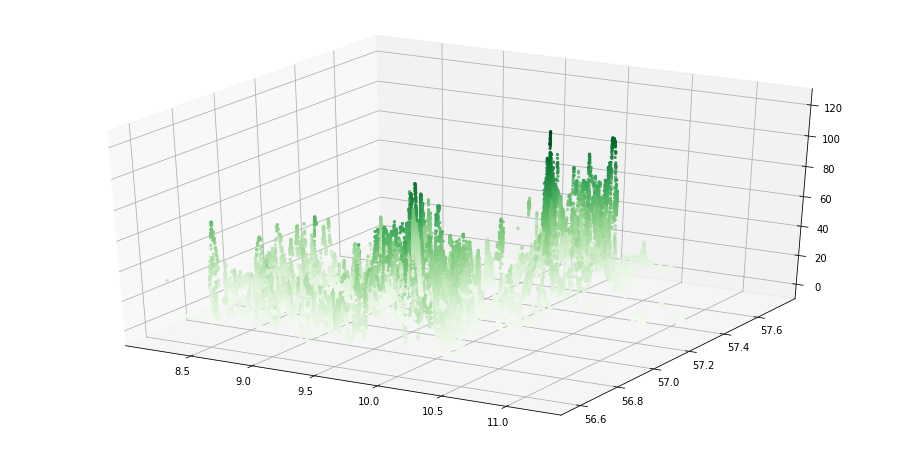

In [28]:
fig = plt.figure(figsize = [16, 8])
ax = fig.gca(projection = '3d')
ax.scatter3D(x, y, z, c=z, cmap = 'Greens', marker = ".")

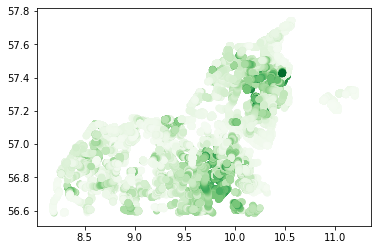

In [29]:
plt.scatter(x, y, c=z, cmap='Greens')

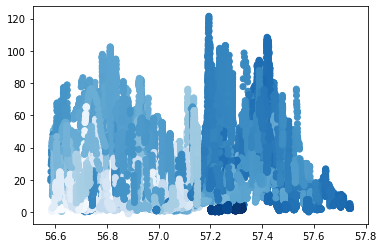

In [32]:
plt.scatter(y, z, c=x, cmap='Blues')

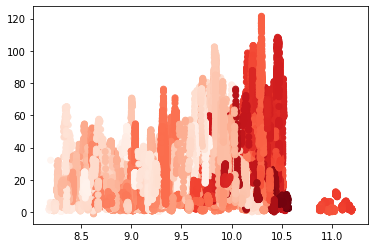

In [31]:
plt.scatter(x, z, c=y, cmap='Reds')

In [37]:
df.head()

,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [49]:
from sklearn.preprocessing import StandardScaler
ind_val = df_out.drop(['OSM_ID'], axis = 1).values
dep_val = df_out['ALTITUDE'].values

ind_val = StandardScaler().fit_transform(ind_val)

columns = ['LONGITUDE', 'LATITUDE', 'ALTITUDE']
# pd.DataFrame(ind_val, columns=columns).head()

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(ind_val)
pcdf = pd.DataFrame(data = pc, columns = ['pc1', 'pc2'])

In [51]:
pcdf.head()

,pc1,pc2
0,1.381333,0.484005
1,1.379396,0.513304
2,1.378261,0.530718
3,1.377154,0.541369
4,1.374169,0.586175


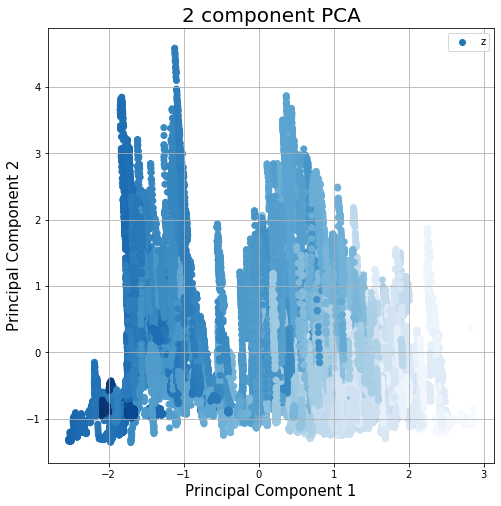

In [60]:
import matplotlib.pyplot as plt

pc1 = pcdf['pc1']
pc2 = pcdf['pc2']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

ax.scatter(pc1, pc2, c=x, cmap = 'Blues')
ax.legend(['z'])
ax.grid()